# Lecture 11

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rk_step(y_n, dt, rhs, t):
    k1 = rhs(y_n, t)
    k2 = rhs(y_n+dt/2*k1, t+dt/2.)
    k3 = rhs(y_n+dt/2*k2, t+dt/2.)
    k4 = rhs(y_n+dt*k3, t+dt)
    y_np1 = y_n + dt/6 *(k1+2*k2+2*k3+k4)
    return y_np1

In [7]:
omega = np.pi*2.
omega0 = 1.5*omega
beta = omega0/4.
def rhs(y, t): # DDP
    # y = (phi, phi_dot)
    dydt = np.array([y[1],-2*beta*y[1]-omega0**2*np.sin(y[0])+gamma*omega0**2*np.cos(omega*t)])
    return dydt

In [8]:
def run():
    tmax = 110
    t = 0
    dt = 2.*np.pi/omega/100.
    Nsteps = int(tmax//dt)
    y = np.array([-np.pi/2.,0])
    ys = []
    for i in range(Nsteps):
        y = rk_step(y, dt, rhs, t)
        t += dt
        if t>100. and i%100==0:
            ys.append(y[0])
    return np.array(ys)

In [9]:
gammas = np.linspace(1.06,1.085,100)
results = []
for gamma in gammas:
    p = run()
    for r in p:
        results.append([gamma, r])
results = np.array(results)

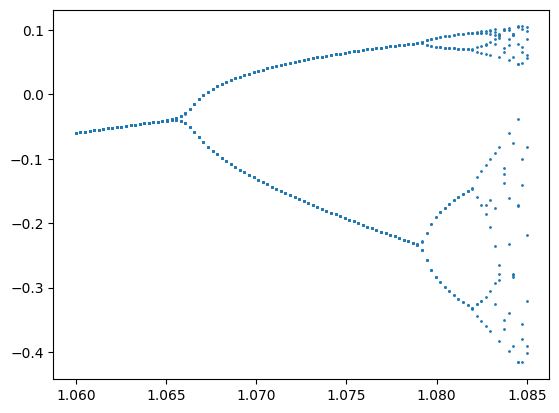

In [10]:
fig, ax = plt.subplots()
ax.scatter(results[:,0],results[:,1],s=1)